In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
# load and read the datset 
data = pd.read_csv(r'healthinsurance.csv')
data.head(3)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2


In [11]:
# nbr of features vs instances

data.shape

(15000, 13)

In [12]:
data.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim'],
      dtype='object')

In [13]:
data.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [ ]:
##### duplicate analysis #######

***************************************************


In [18]:
data.duplicated().any()

True

In [19]:
data.duplicated().value_counts()

False    13904
True      1096
Name: count, dtype: int64

In [22]:
duplicates = data[data.duplicated()]
duplicates

In [29]:
data = data.drop_duplicates()

In [30]:
data.shape ## data shape after removing duplicates

(13904, 13)

In [ ]:
# ###### Chechking for missing values ### 

In [33]:
data.isna().any()  # or data.isnull().any()

age                     True
sex                    False
weight                 False
bmi                     True
hereditary_diseases    False
no_of_dependents       False
smoker                 False
city                   False
bloodpressure          False
diabetes               False
regular_ex             False
job_title              False
claim                  False
dtype: bool

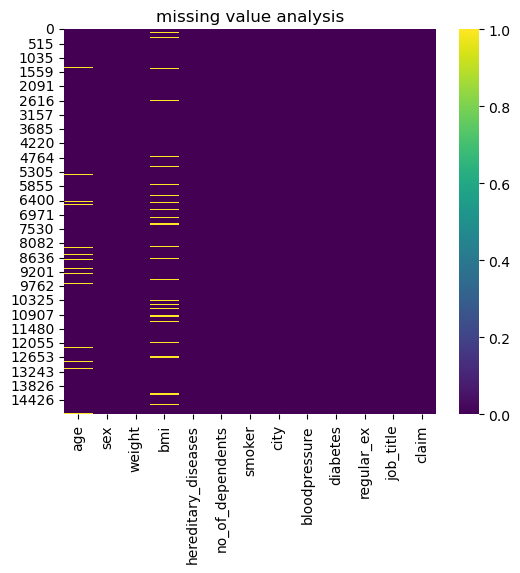

In [41]:
plt.figure(figsize = (6,5))
sns.heatmap(data.isna(), cmap = 'viridis')
plt.title ('missing value analysis')
plt.show()

For the age and BMI columns, there are missing values that are completely at random. 
Therefore, we need to handle them first.

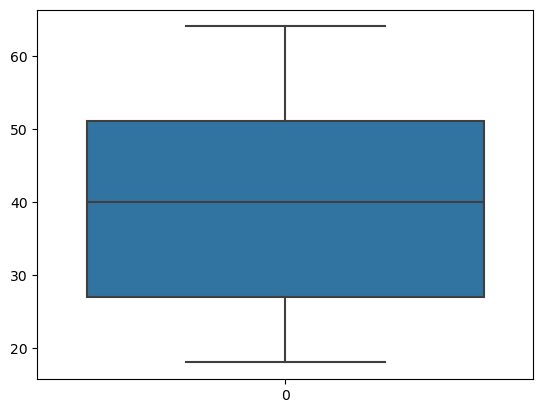

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

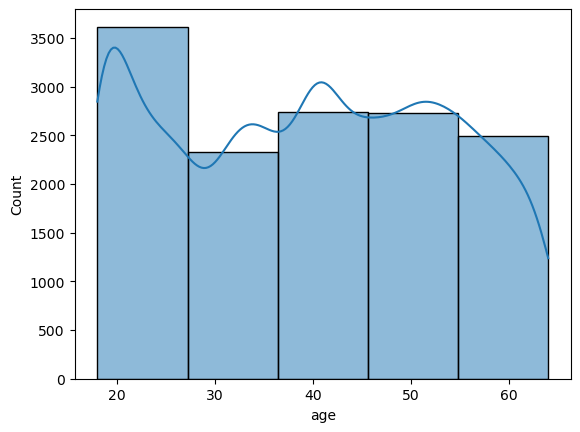

In [53]:
sns.boxplot(data['age'])
plt.show()
sns.histplot(data['age'], kde = True, bins = 5)

<Axes: >

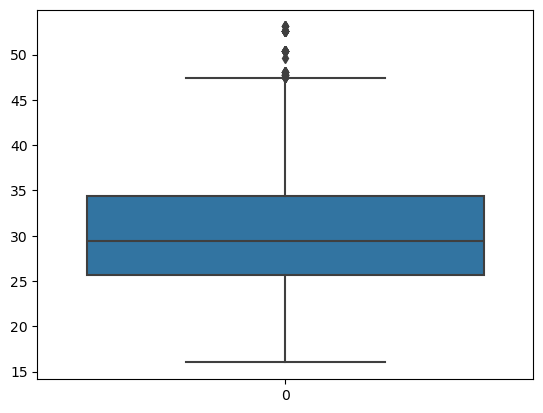

In [49]:
sns.boxplot(data['bmi'])

As there are some outliers in bmi column, we fill the missings using Median. 

we do the same for age as it is not normally distributed

In [51]:
data['age'].fillna(data['age'].median(), inplace = True)
data['bmi'].fillna(data['age'].median(), inplace = True)

In [56]:
### datatypes analysis


num_cols = data.select_dtypes(include = 'number').columns.to_list()
cat_cols = data.select_dtypes(exclude = 'number').columns.to_list()

print(f'categorical columns are: {cat_cols}')
print(f'numerical columns are: {num_cols}')

categorical columns are: ['sex', 'hereditary_diseases', 'city', 'job_title']
numerical columns are: ['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes', 'regular_ex', 'claim']


In [ ]:
for col in num_cols:
    print(f'Descriptive statiques for {col} is : ')
    print(data[col].describe())
    print('\n')

In [ ]:
# Statistical measures of  numerical columns #######

In [64]:
data.describe(include = 'number')

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,13904.000000,13904.000000,13904.000000,13904.000000,13904.000000,13904.000000,13904.000000,13904.000000,13904.000000
mean,39.568110,64.894347,30.903776,1.126438,0.200662,68.657652,0.771145,0.230725,13431.813744
std,13.828128,13.675070,6.389124,1.225661,0.400510,19.430514,0.420111,0.421312,12142.099413
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.900000,0.000000,0.000000,64.000000,1.000000,0.000000,4883.900000
50%,40.000000,63.000000,29.900000,1.000000,0.000000,71.000000,1.000000,0.000000,9567.000000
75%,51.000000,76.000000,35.600000,2.000000,0.000000,80.000000,1.000000,0.000000,16657.700000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [63]:
# Frequency Distribution
print("Frequency Distribution:\n", data['sex'].value_counts())

# Proportion Distribution
print("\nProportion Distribution:\n", data['sex'].value_counts(normalize=True) * 100)

Frequency Distribution:
 sex
female    7091
male      6813
Name: count, dtype: int64

Proportion Distribution:
 sex
female    50.999712
male      49.000288
Name: proportion, dtype: float64


In [65]:
data.describe(exclude = 'number')

,sex,hereditary_diseases,city,job_title
count,13904,13904,13904,13904
unique,2,10,91,35
top,female,NoDisease,Nashville,Student
freq,7091,12965,270,1220


In [73]:
data['hereditary_diseases'].value_counts()

hereditary_diseases
NoDisease       12965
Alzheimer         137
Diabetes          136
Obesity           130
EyeDisease        112
Cancer            107
Arthritis          88
HeartDisease       87
Epilepsy           77
High BP            65
Name: count, dtype: int64

In [74]:
data.city.value_counts()

city
Nashville     270
Memphis       269
NewOrleans    268
Charleston    267
Brimingham    266
             ... 
York           68
Warwick        67
Syracuse       67
Baltimore      67
Trenton        66
Name: count, Length: 91, dtype: int64

In [75]:
data['city'].nunique()

91

# Data visualisations

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

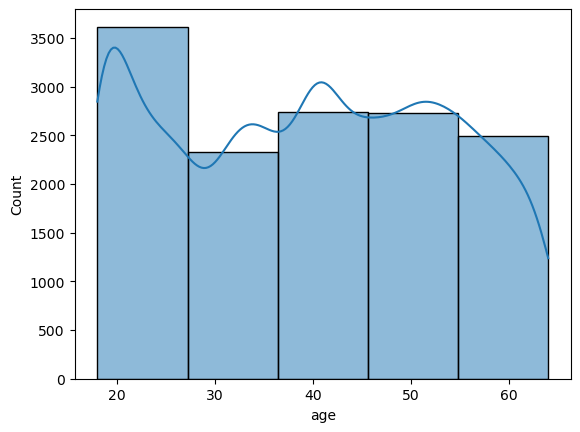

In [78]:
sns.histplot(data['age'], kde = True, bins = 5)

<Axes: ylabel='Frequency'>

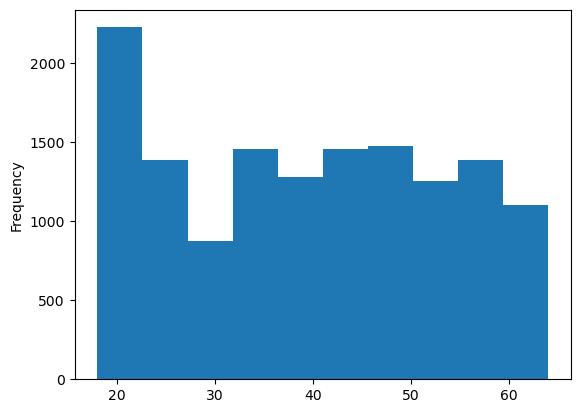

In [76]:
data['age'].plot(kind = 'hist')

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Count'>

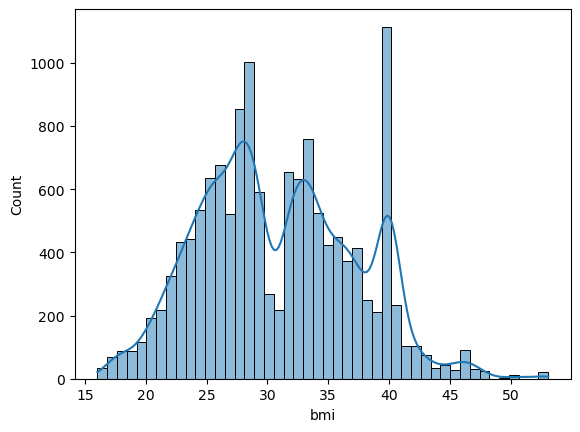

In [79]:
sns.histplot(data['bmi'], kde = True)

In [81]:
data['bmi'].mode()

0    40.0
Name: bmi, dtype: float64

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='job_title', ylabel='Count'>

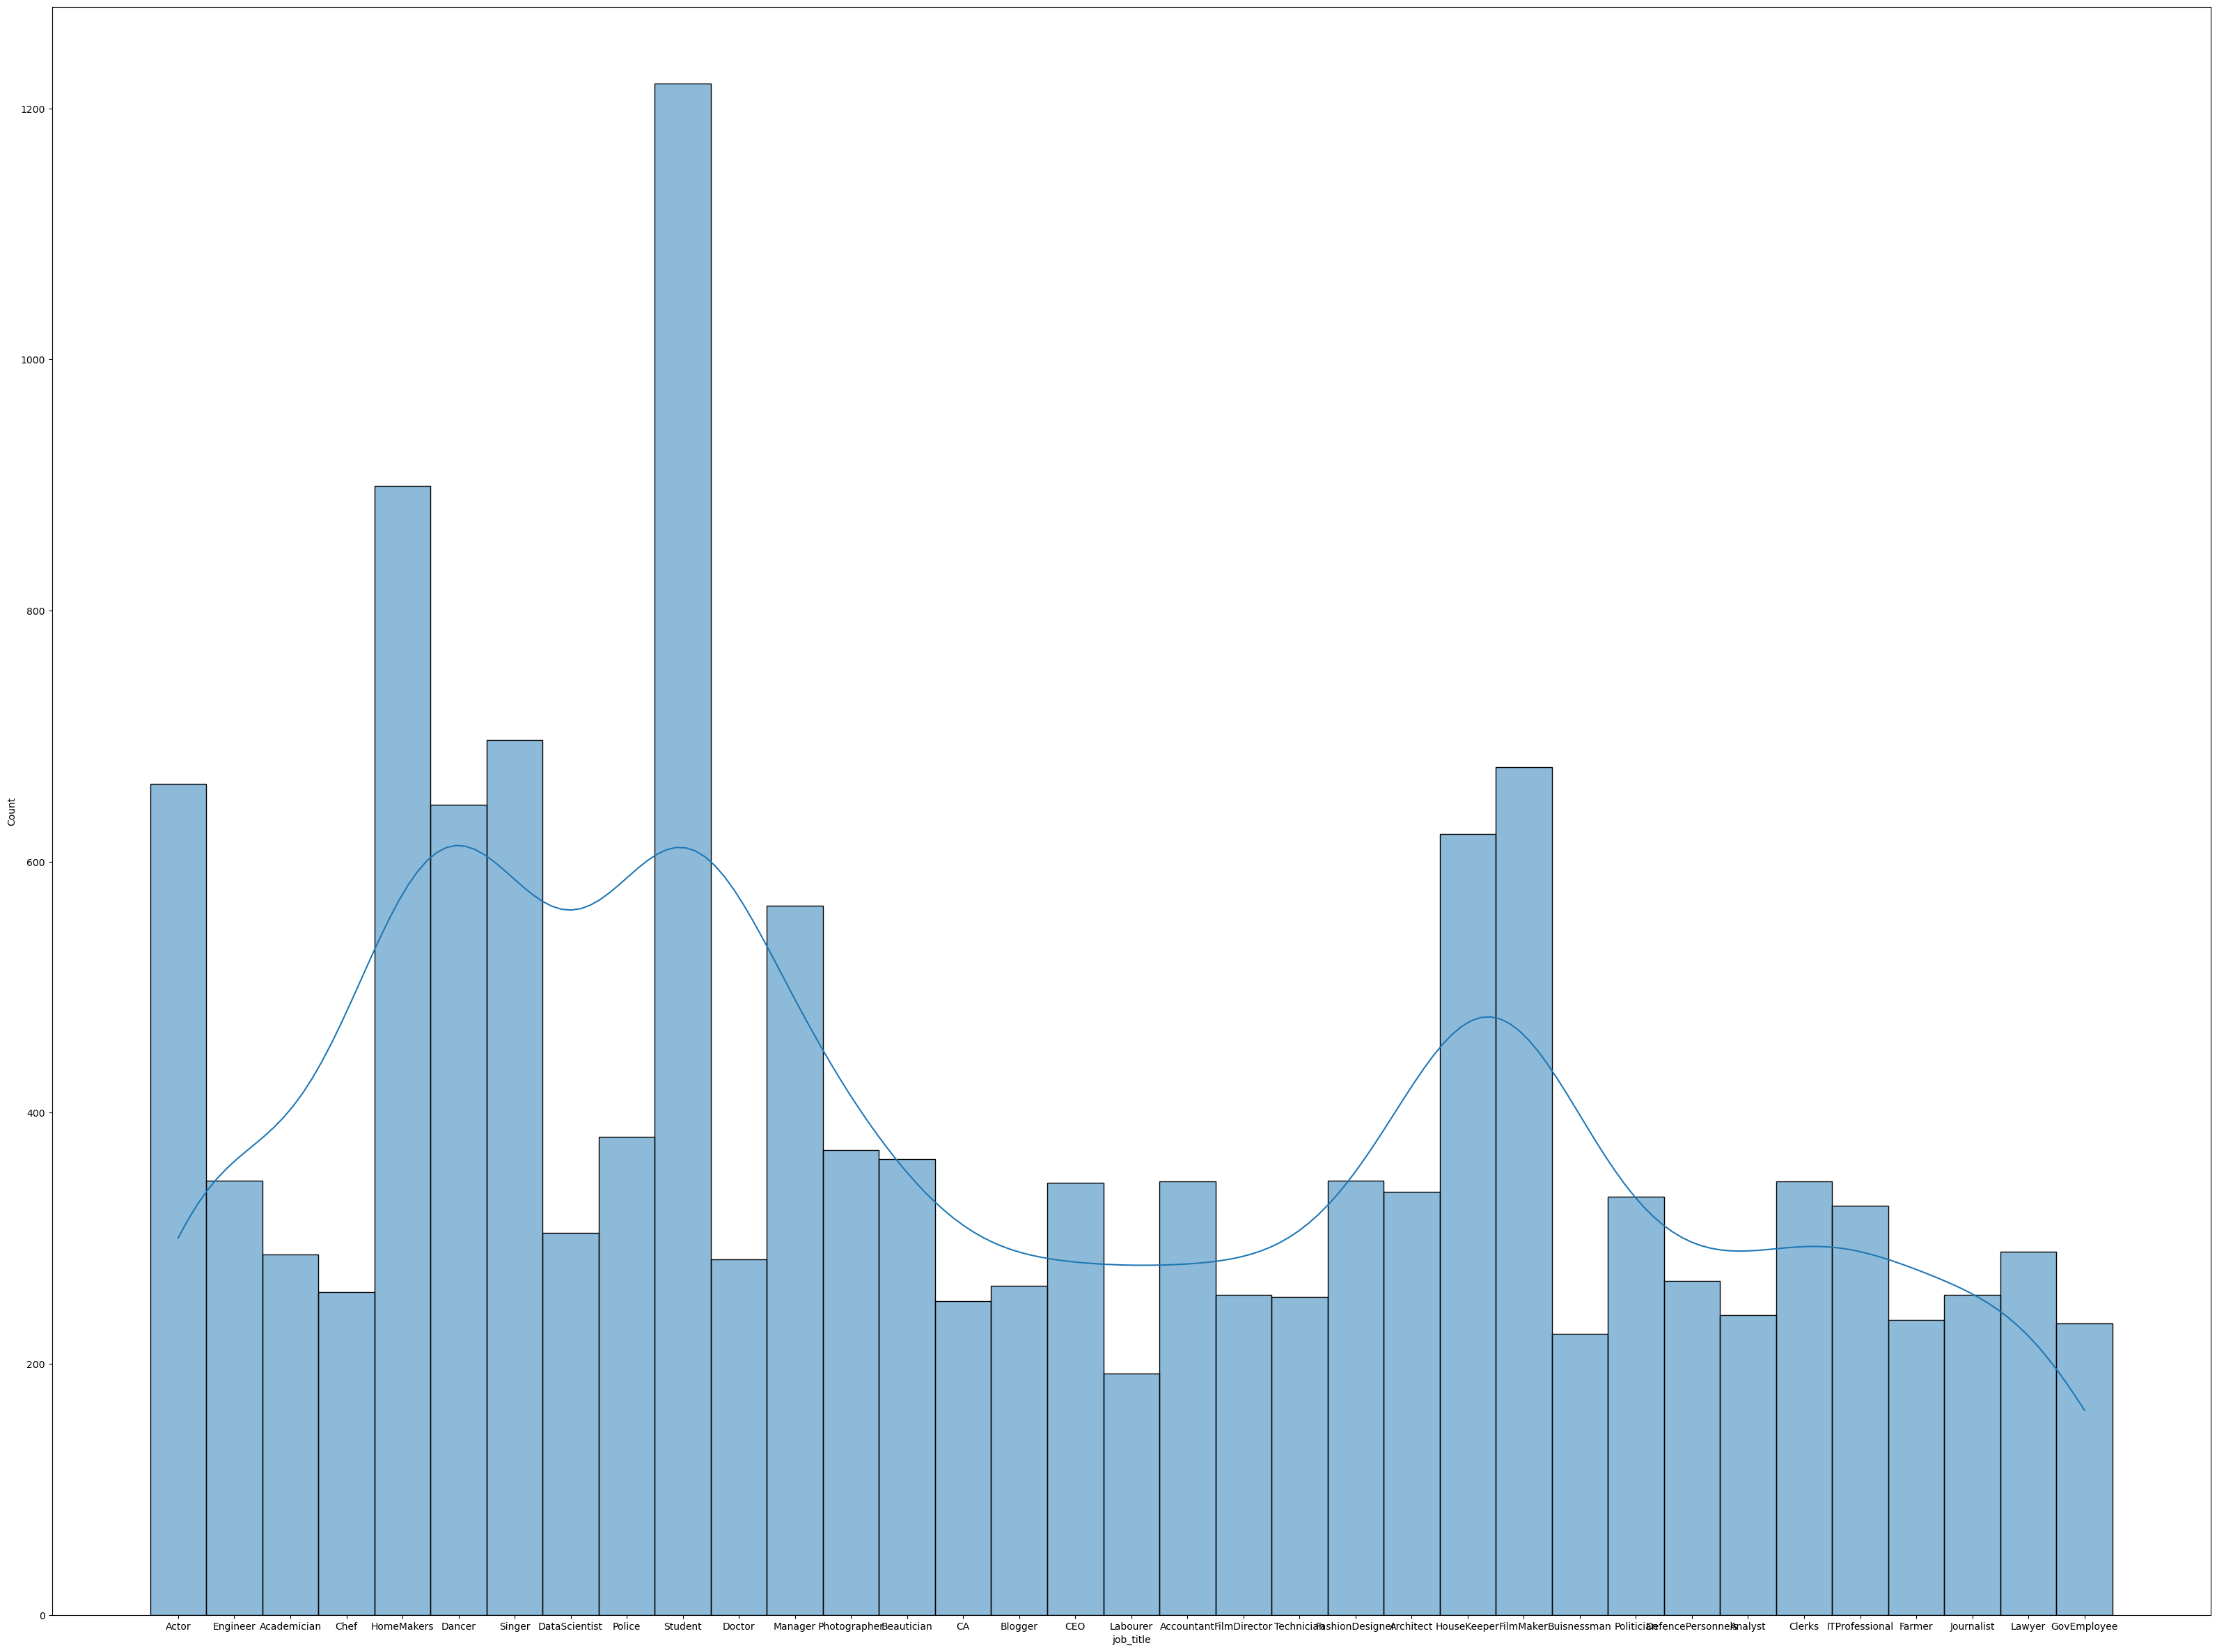

In [91]:
plt.figure(figsize = (40,30
                     ))
sns.histplot(data['job_title'], kde = True)

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='job_title', ylabel='Count'>

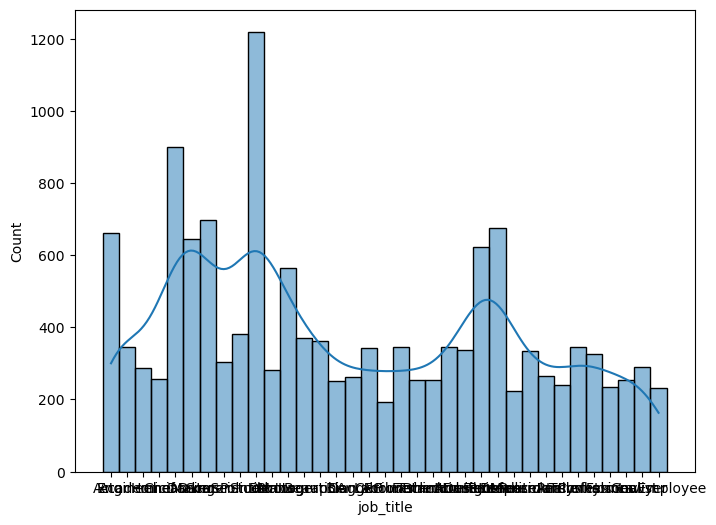

In [93]:
plt.figure(figsize = (8,6
                     ))
sns.histplot(data['job_title'], kde = True)

# Bar graphs

<Axes: xlabel='job_title'>

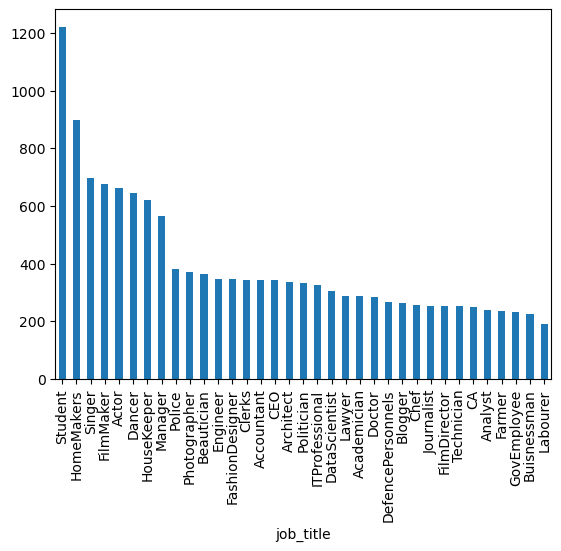

In [94]:
data['job_title'].value_counts().plot(kind = 'bar')

<Axes: xlabel='job_title', ylabel='count'>

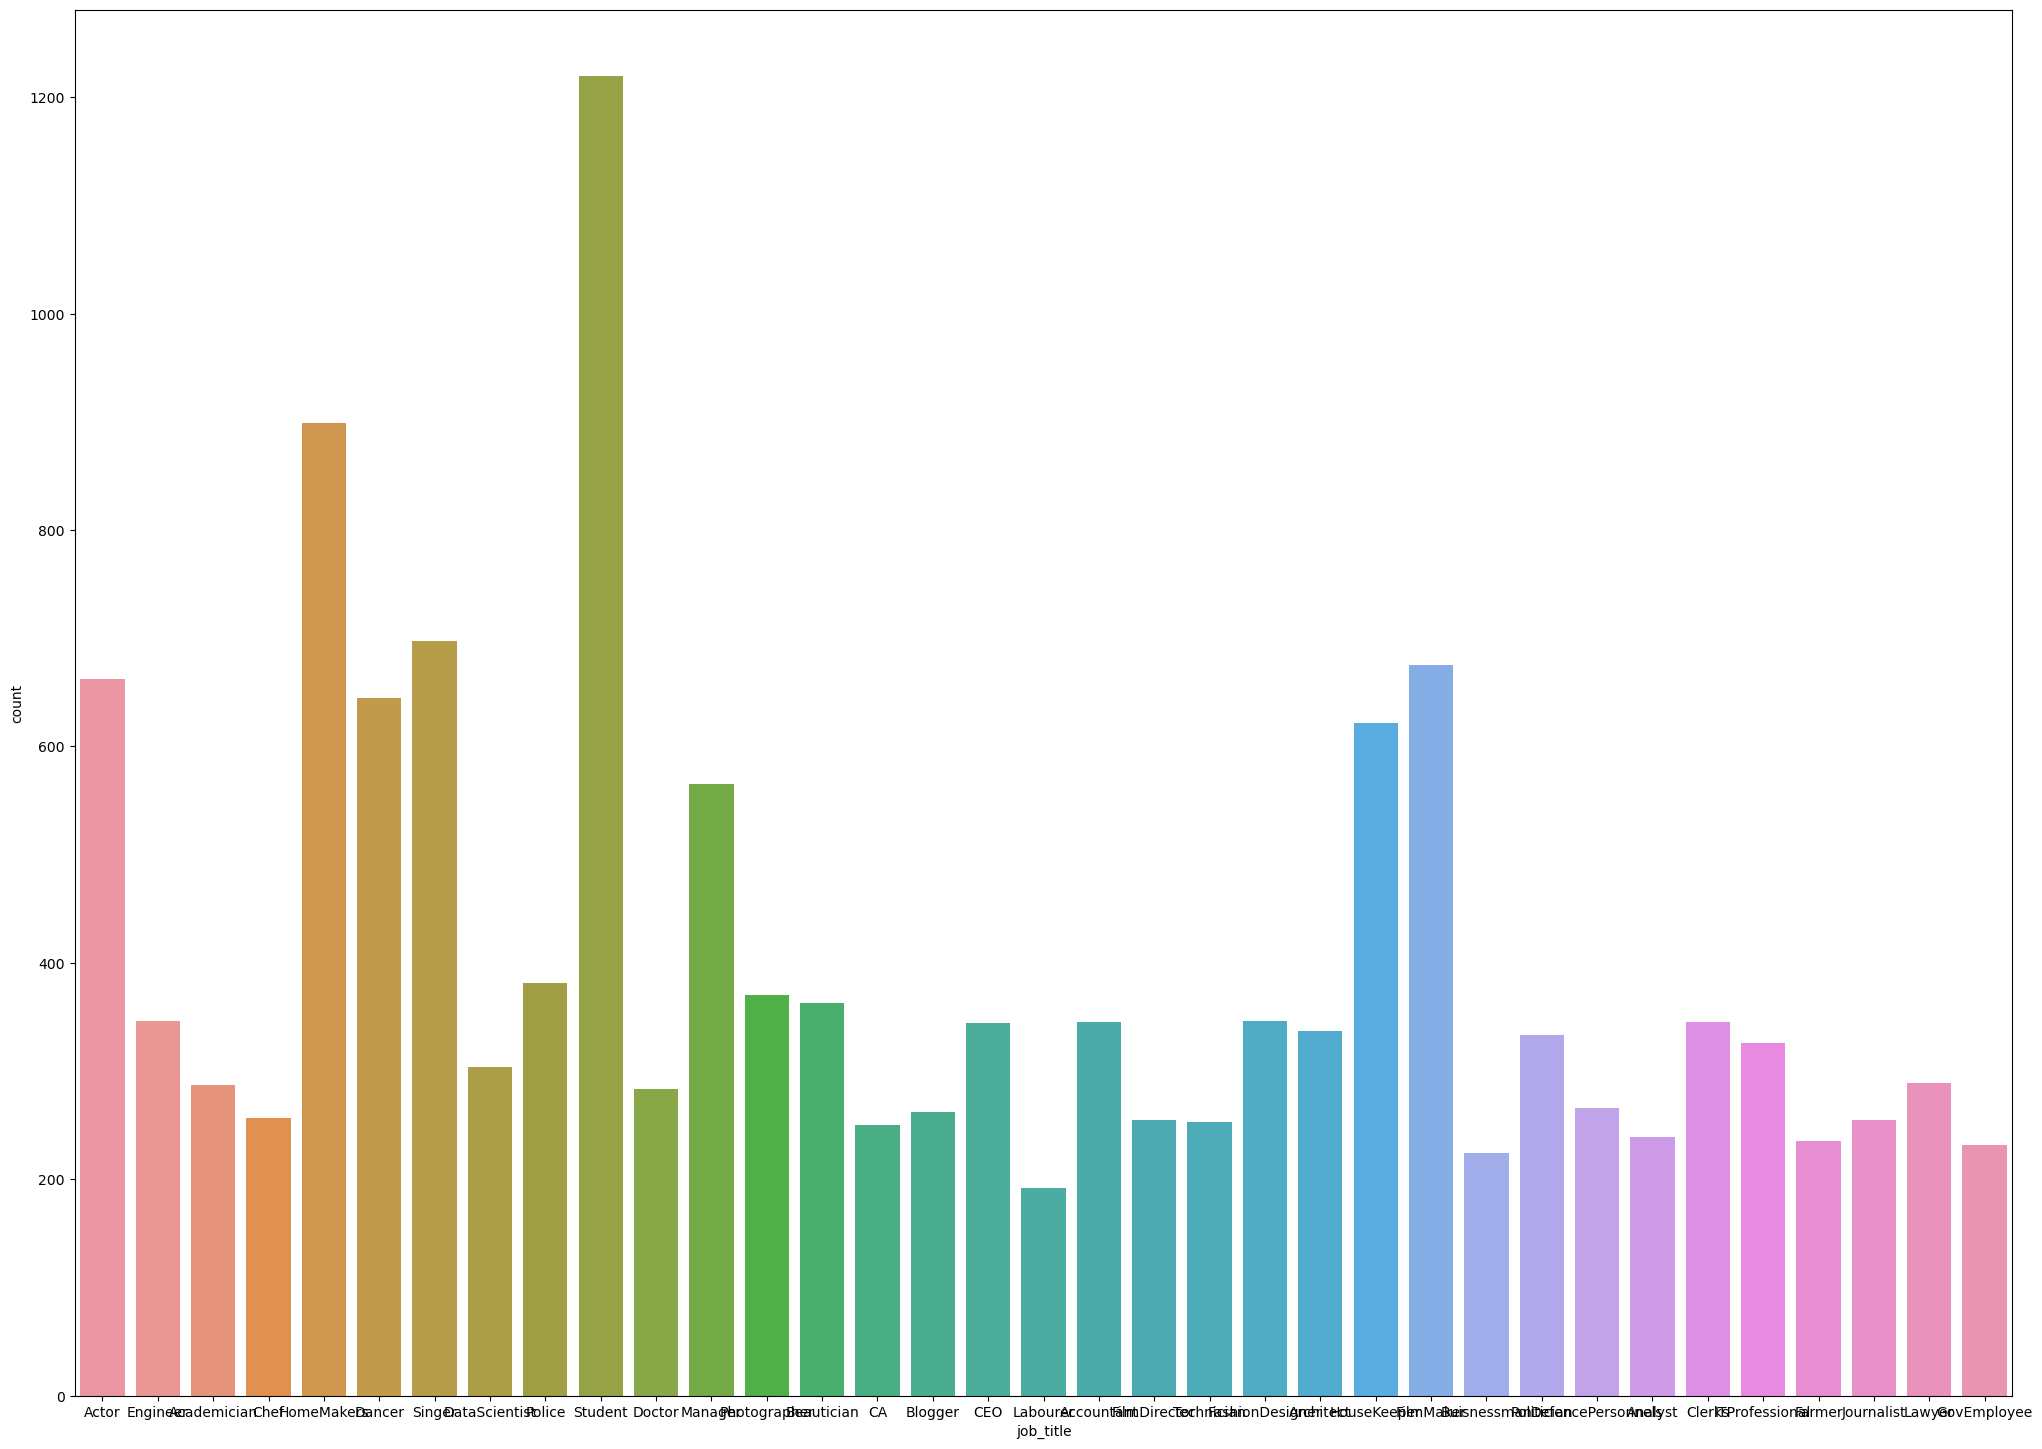

In [96]:
plt.figure(figsize = (25, 18))
sns.countplot(data=data, x='job_title')

In [103]:
  corr_data = data [num_cols].corr()
corr_data

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
age,1.000000,0.279462,0.161673,0.054517,-0.021871,-0.008156,0.067945,0.005698,0.297310
weight,0.279462,1.000000,0.232810,0.129361,0.019906,-0.024746,-0.013123,-0.004183,0.081815
bmi,0.161673,0.232810,1.000000,0.051567,0.023619,-0.042319,0.053731,-0.031536,0.193551
no_of_dependents,0.054517,0.129361,0.051567,1.000000,0.009266,0.018519,0.066118,-0.013597,0.067536
smoker,-0.021871,0.019906,0.023619,0.009266,1.000000,0.003846,0.057071,-0.034409,0.770423
bloodpressure,-0.008156,-0.024746,-0.042319,0.018519,0.003846,1.000000,-0.013317,0.042870,0.012168
diabetes,0.067945,-0.013123,0.053731,0.066118,0.057071,-0.013317,1.000000,0.005757,0.134828
regular_ex,0.005698,-0.004183,-0.031536,-0.013597,-0.034409,0.042870,0.005757,1.000000,-0.060346
claim,0.297310,0.081815,0.193551,0.067536,0.770423,0.012168,0.134828,-0.060346,1.000000


<Axes: >

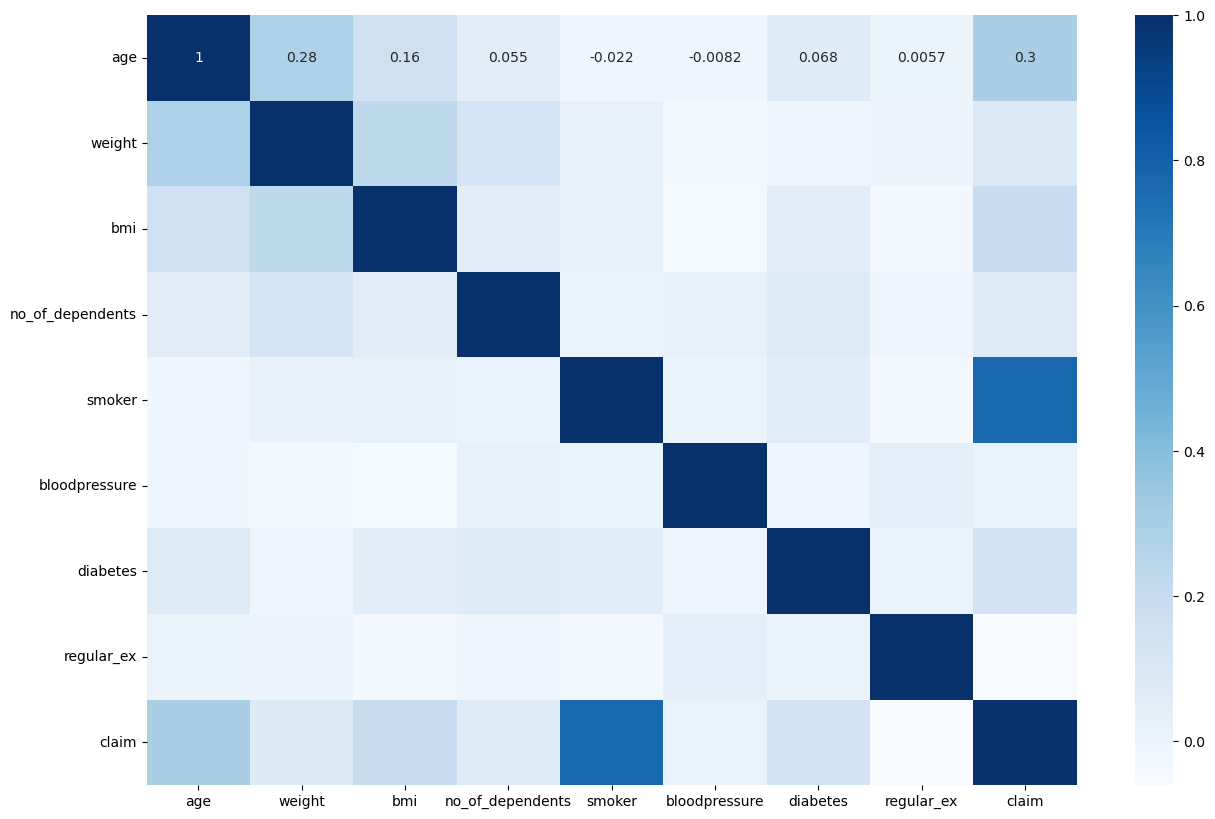

In [107]:
plt.figure(figsize = (15, 10))
sns.heatmap(corr_data, cbar = True, annot = True, cmap = 'Blues')

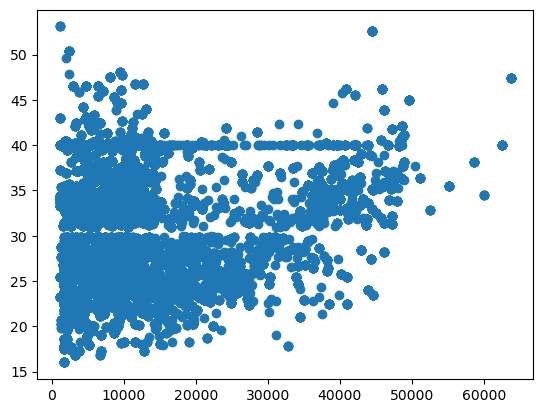

In [108]:
plt.scatter(data = data, x = 'claim', y = 'bmi')

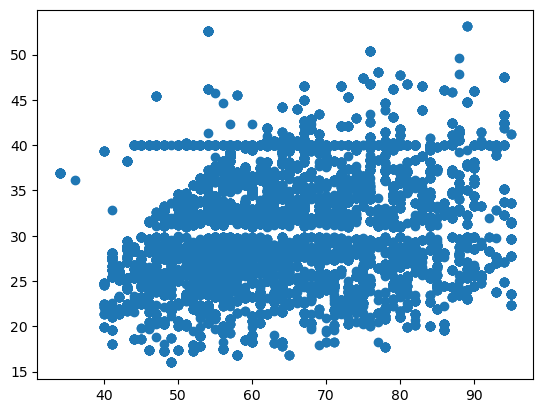

In [110]:
plt.scatter(data = data, x = 'weight', y = 'bmi')

In [113]:
smoker = data.groupby('smoker')['claim'].mean().reset_index()
smoker

,smoker,claim
0,0,8745.036513
1,1,32101.649642


<Axes: xlabel='smoker'>

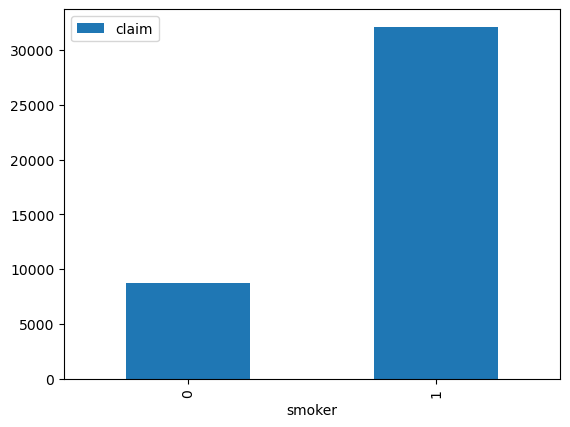

In [114]:
smoker.plot(kind = 'bar', x = 'smoker', y = 'claim')

<Axes: xlabel='sex'>

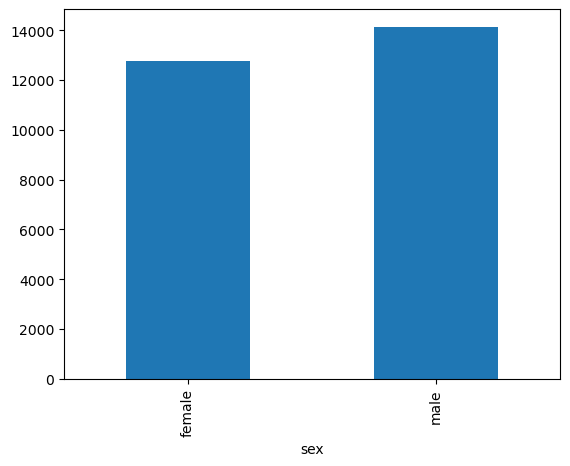

In [119]:
sex_df = data.groupby('sex')['claim'].mean()
sex_df.plot(kind = 'bar', x = 'smoker', y = 'claim')

<Axes: xlabel='job_title'>

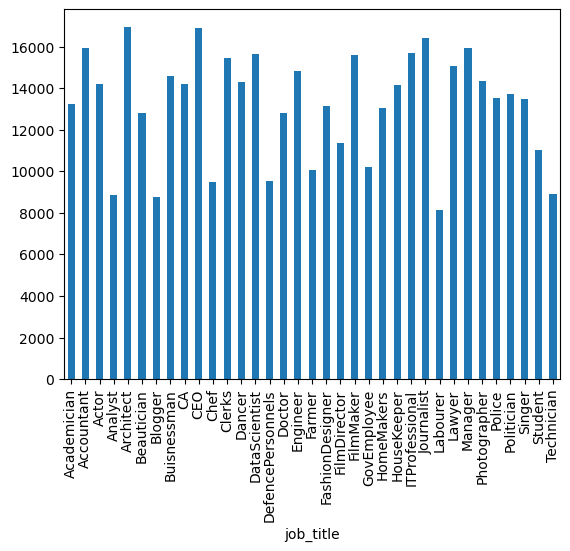

In [120]:
job_df = data.groupby('job_title')['claim'].mean()
job_df.plot(kind = 'bar', x = 'smoker', y = 'claim')

In [125]:
pd.crosstab(data['job_title'], data['sex'])

sex,female,male
job_title,,
Academician,118,169
Accountant,154,191
Actor,288,374
Analyst,121,118
Architect,181,156
Beautician,212,151
Blogger,145,117
Buisnessman,154,70
CA,196,54
